### This notebook will feature my experiments with exploring the data extracted from r/India's subreddit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's load the data first
dataset = pd.read_csv('newdataset.csv')

In [3]:
dataset.head()

,Title,id,url,content,flair
0,Pitting a community against a political party ...,futac9,https://www.reddit.com/r/india/comments/futac9...,First of all let me start by saying it was stu...,Politics
1,Hit by backlash over posts on lack of medical ...,fpaj1w,https://theprint.in/india/hit-by-backlash-over...,NaN,Politics
2,Politics in the time of corona: WB CM question...,fxs1vy,https://www.timesnownews.com/india/article/pol...,NaN,Politics
3,A new political party gave a full front page a...,ff8sth,https://i.redd.it/yjo9wpy38el41.jpg,NaN,Politics
4,"I’ve been curious, which Indian politicians do...",fs887w,https://www.reddit.com/r/india/comments/fs887w...,"Personally, I would pick Kerala-CM, Pinarayi V...",Politics


In [4]:
dataset.shape

(2663, 5)

Our main focus in on title and content for features and on the flair for classification, let's drop id and url for now

In [5]:
datasetNoIdUrl = dataset.drop(['id', 'url'], axis=1)
#or datasetNoIdUrl = dataset.drop(columns=['id', 'url'])

In [6]:
help(dataset.drop)

Help on method drop in module pandas.core.frame:

drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise') method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index : single label or list-like
        Alternative to specifying axis (``labels, axis=0``
        is equivalent to ``index=labels``).
    
        .. versionadded:: 0.21.0
    columns : single label or list-like
        Alternative to specifying axis (

In [7]:
print(datasetNoIdUrl.shape)
datasetNoIdUrl.head()

(2663, 3)


,Title,content,flair
0,Pitting a community against a political party ...,First of all let me start by saying it was stu...,Politics
1,Hit by backlash over posts on lack of medical ...,NaN,Politics
2,Politics in the time of corona: WB CM question...,NaN,Politics
3,A new political party gave a full front page a...,NaN,Politics
4,"I’ve been curious, which Indian politicians do...","Personally, I would pick Kerala-CM, Pinarayi V...",Politics


### Let's start analysing each column/attribute.

### First is title

Let's see the average length of a headline (or title) and the mean variance around the length of title

In [29]:
print(datasetNoIdUrl['Title'][1])
res = len(datasetNoIdUrl['Title'][1].split()) 
res


Hit by backlash over posts on lack of medical gear, doctors go silent on social media | Two doctors who tweeted about shortage of protective gear for medical personnel handling Covid-19 cases were trolled, and accused of political propaganda.


39

avergae length of a title (in terms of words) in posts:  13.54562523469771


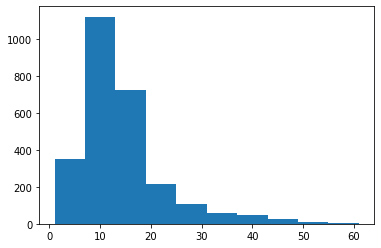

In [36]:
# finding avergae length of a title (in terms of words) in posts
titlesLen = []
for i in range(datasetNoIdUrl['Title'].shape[0]):
    titlesLen.append(len(datasetNoIdUrl['Title'][i].split()))

plt.hist(titlesLen)  
print("avergae length of a title (in terms of words) in posts: ", np.mean(np.array(titlesLen)))

### Next is content

In [8]:
# finding number of NaN values in content
contentNaNvalues = datasetNoIdUrl['content'].isna().sum()
contentvalues = datasetNoIdUrl.shape[0] - contentNaNvalues

print(contentNaNvalues, contentvalues)

1198 1465


#### Let's plot a pie chart to see the distribution between NaN content and actual content posts

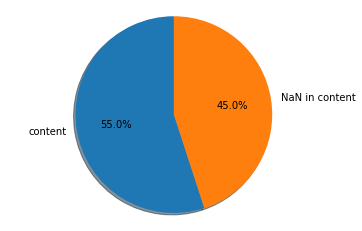

In [9]:
# fig = plt.figure()
labels = 'content', 'NaN in content'
sizes = [contentvalues, contentNaNvalues]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

avergae length of a content (in terms of words) in posts:  365.09215017064844


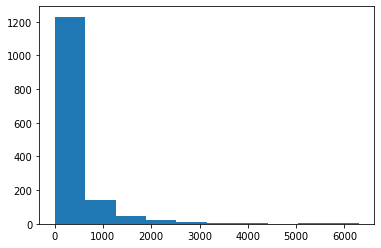

In [68]:
# finding content distribution in the posts in which content was present

contentLen = []

contentDatasetWithoutNaN = datasetNoIdUrl['content'].dropna()

datasetNoIdUrl[datasetNoIdUrl['content'].notnull()]

for content in contentDatasetWithoutNaN:
    contentLen.append(len(content.split()))
    
plt.hist(contentLen)  
print("avergae length of a content (in terms of words) in posts: ", np.mean(np.array(contentLen)))

### Finally, flair

Let's now see how many samples of each flair are present

In [10]:
# number of unique flairs
datasetNoIdUrl['flair'].nunique()

12

In [11]:
datasetflairs = datasetNoIdUrl['flair'].value_counts()
datasetflairs 

Politics              249
Coronavirus           249
Food                  244
Scheduled             234
Business/Finance      233
Sports                232
AskIndia              231
Photography           222
Science/Technology    221
Policy/Economy        220
Non-Political         217
CAA-NRC-NPR           111
Name: flair, dtype: int64

In [12]:
type(datasetflairs)

pandas.core.series.Series

In [13]:
datasetflairsnames = datasetflairs.index
datasetflairsnames

Index(['Politics', 'Coronavirus', 'Food', 'Scheduled', 'Business/Finance',
       'Sports', 'AskIndia', 'Photography', 'Science/Technology',
       'Policy/Economy', 'Non-Political', 'CAA-NRC-NPR'],
      dtype='object')

In [14]:
datasetflairs.shape

(12,)

In [15]:
datasetflairs.values

array([249, 249, 244, 234, 233, 232, 231, 222, 221, 220, 217, 111])

Let's plot a bar graph of this!

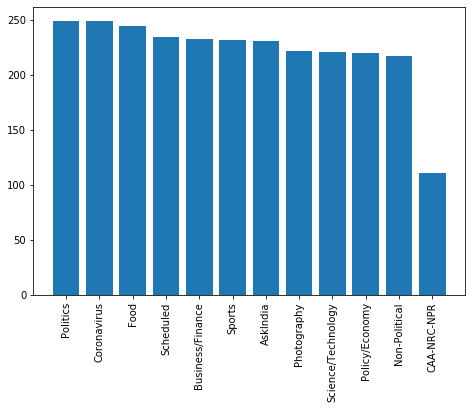

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0, 1, 1])
flairs = datasetflairsnames
frequency = datasetflairs.values
ax.bar(flairs, frequency)
plt.xticks(rotation=90)
plt.show()

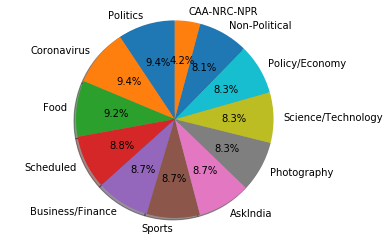

In [17]:
# fig = plt.figure()
labels = datasetflairsnames
sizes = datasetflairs.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Evenly distributed since posts were extracted according to flairs

All these distributions can be contrasted with the previous graphs obtained by using the hottest posts - in the file dataset.csv